In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh, norm, expm
from scipy.optimize import curve_fit

%matplotlib widget

# Sawtooth lattice

In [2]:
N = 200 #number of primitive cells
n = 2*N #number of points
eps_a = 0.
eps_b = 0.
t_aa = 0.
t_ab = np.sqrt(2)
t_bb = 1.

In [3]:
H = np.diag([eps_b/2,eps_a/2]*N)
H += np.diag([-t_ab]*(n-1),k=1)
H += np.diag([-t_bb,-t_aa]*(N-1),k=2)

H[0,n-2] -= t_bb

H += np.conjugate(H.transpose())

In [4]:
eigvals, eigvect = eigh(H)

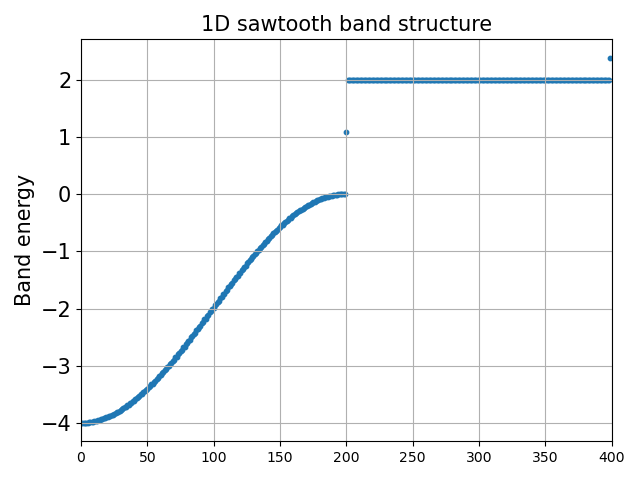

In [5]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("1D sawtooth band structure",fontsize=15)
ax.set_ylabel("Band energy",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()
plt.savefig("spectrum_sawtooth.png")
plt.show()

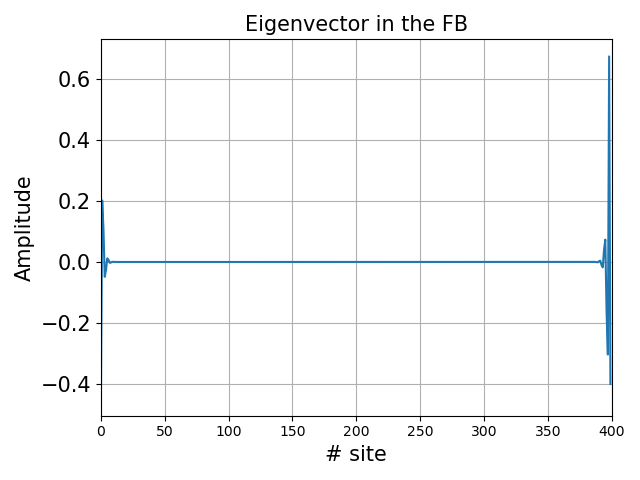

In [6]:
fig, ax = plt.subplots(tight_layout=True)

ax.plot(eigvect[:,-1])

ax.set_title("Eigenvector in the FB",fontsize=15)
ax.set_xlabel("# site",fontsize=15)
ax.set_ylabel("Amplitude",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()

plt.savefig("eig_FB.pdf")
plt.show()

# Adding an atom

In [79]:
omega0 = 2.1 #atom frequency
g = 0.1 #atom-cavity coupling

In [80]:
H = np.diag([eps_b/2,eps_a/2]*N + [omega0/2])
H += np.diag([-t_ab]*(n-1) + [0],k=1)
H += np.diag([-t_bb,-t_aa]*(N-1) + [0],k=2)

H[0,n-2] -= t_bb
H[N-1,-1] -= g #coupling to an A site

H += np.conjugate(H.transpose())

In [51]:
eigvals, eigvect = eigh(H)

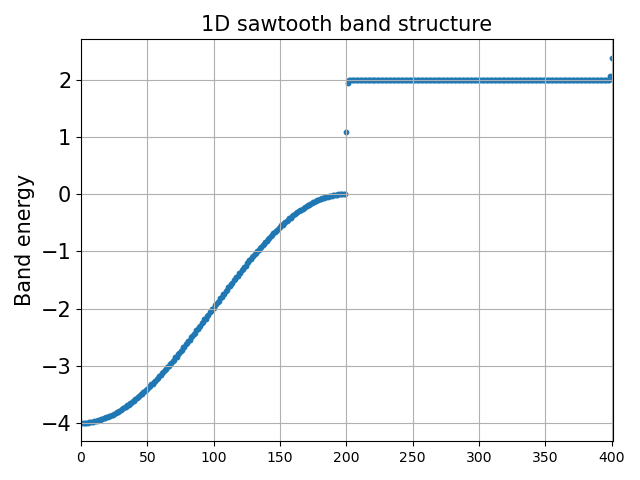

In [32]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("1D sawtooth band structure",fontsize=15)
ax.set_ylabel("Band energy",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()
plt.show()

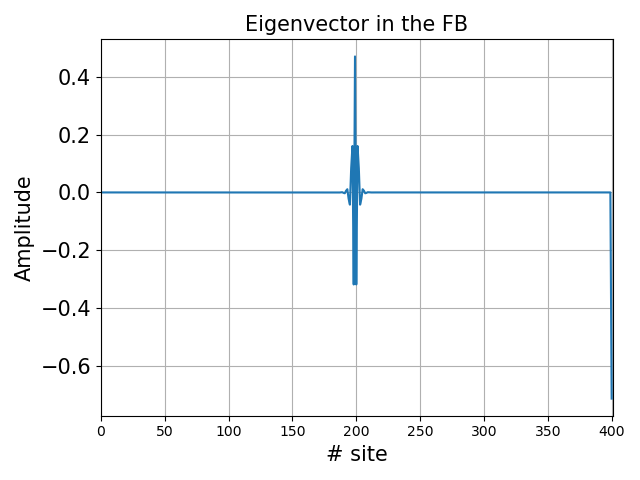

In [33]:
fig, ax = plt.subplots(tight_layout=True)

ax.plot(eigvect[:,-2])

ax.set_title("Eigenvector in the FB",fontsize=15)
ax.set_xlabel("# site",fontsize=15)
ax.set_ylabel("Amplitude",fontsize=15)

ax.set_xlim(0,len(eigvals))
plt.yticks(fontsize=15)

plt.grid()

plt.show()

In [81]:
t = np.linspace(0,150,100)

psi_in = np.array([0.]*n + [1.])
pop = []
phot = np.zeros((n,len(t)),dtype="complex128")
norma = []

temp2 = np.zeros(10,dtype="complex128")
for i in np.arange(0,len(t),1):
    temp = (expm(-1.j*H*t[i])@psi_in)
    phot[:,i] = temp[:-1]
    pop.append(temp[-1])
    
    temp2[:9] = temp[195:204]
    temp2[-1] = temp[-1]
    norma.append(norm(temp2))

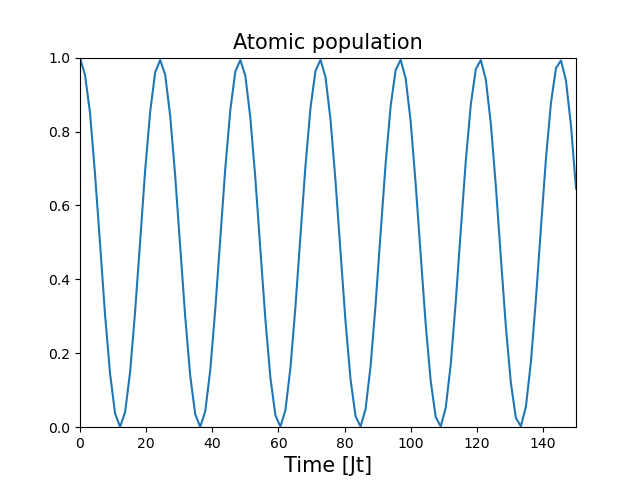

In [69]:
fig = plt.figure()

fac = 1.9498285473526304
plt.plot(t,np.real(pop*np.conjugate(pop)))
#plt.plot(t,np.cos((fac*g/np.sqrt(9))*t)**2,ls="--",label="Fit")

plt.title("Atomic population",fontsize=15)
plt.xlabel("Time [Jt]",fontsize=15)

plt.xlim(0,t[-1])
plt.ylim(0,1)
#plt.legend()

#plt.savefig("resonant_sawt_fb.png")
plt.show()

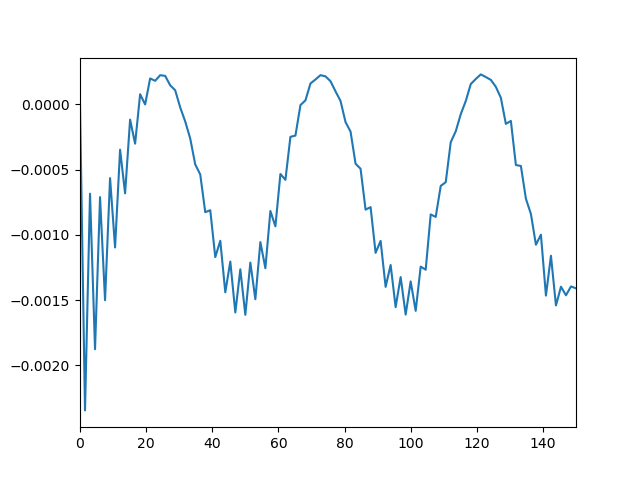

In [54]:
fig = plt.figure()

plt.plot(t,np.real(pop*np.conjugate(pop)) - np.cos((fac*g/np.sqrt(9))*t)**2)


plt.xlim(0,t[-1])

plt.show()

In [78]:
temp0 = np.real(phot[:,s]*np.conjugate(phot[:,s]))

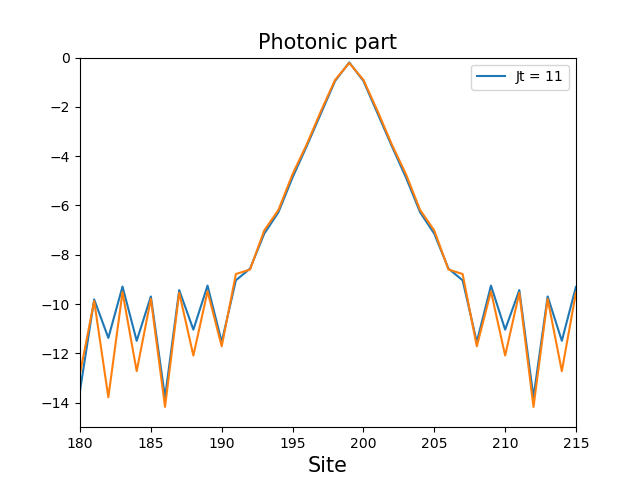

In [82]:
fig = plt.figure()
s=7
temp4 = np.real(phot[:,s]*np.conjugate(phot[:,s]))
plt.plot(np.log(temp4/norm(temp4)),label=f"Jt = {t[s]:.0f}")
plt.plot(np.log(temp0/norm(temp0)))
s=25
#plt.plot(np.real(phot[:,s]*np.conjugate(phot[:,s])),label=f"Jt = {t[s]:.0f}")
s=28
#plt.plot(np.real(phot[:,s]*np.conjugate(phot[:,s])),label=f"Jt = {t[s]:.0f}")

plt.title(f"Photonic part",fontsize=15)
plt.xlabel("Site",fontsize=15)
plt.legend()

plt.xlim(180,215)
plt.ylim(-15,0)

#plt.savefig("resonant2_sawt_fb.png")
plt.show()

In [38]:
t

array([  0.        ,   1.51515152,   3.03030303,   4.54545455,
         6.06060606,   7.57575758,   9.09090909,  10.60606061,
        12.12121212,  13.63636364,  15.15151515,  16.66666667,
        18.18181818,  19.6969697 ,  21.21212121,  22.72727273,
        24.24242424,  25.75757576,  27.27272727,  28.78787879,
        30.3030303 ,  31.81818182,  33.33333333,  34.84848485,
        36.36363636,  37.87878788,  39.39393939,  40.90909091,
        42.42424242,  43.93939394,  45.45454545,  46.96969697,
        48.48484848,  50.        ,  51.51515152,  53.03030303,
        54.54545455,  56.06060606,  57.57575758,  59.09090909,
        60.60606061,  62.12121212,  63.63636364,  65.15151515,
        66.66666667,  68.18181818,  69.6969697 ,  71.21212121,
        72.72727273,  74.24242424,  75.75757576,  77.27272727,
        78.78787879,  80.3030303 ,  81.81818182,  83.33333333,
        84.84848485,  86.36363636,  87.87878788,  89.39393939,
        90.90909091,  92.42424242,  93.93939394,  95.45

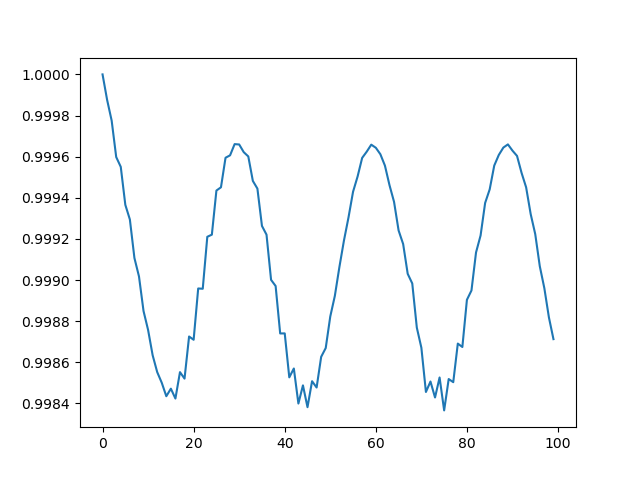

In [16]:
fig = plt.figure()

plt.plot(norma)

plt.show()